# Analysis on Google playstore Apps data

Google Play Store app data refers to the information and statistics associated with apps available on the Google Play Store, which is the primary app distribution platform for Android devices. It includes various data points related to app performance, usage, ratings, reviews, downloads, and other relevant metrics. This data is collected and maintained by Google to provide developers and users with valuable insights into app performance, user behavior, and market trends.

Usage of Google Play Store App Data:

 - App Performance Analysis: Developers can access app data to evaluate the performance of their apps on the Google Play Store. They can analyze metrics such as download numbers, install/uninstall rates, crash reports, and user engagement metrics to assess the success of their app and make data-driven decisions for improvements.
 - Ratings and Reviews: The Play Store app data includes user ratings and reviews for each app. These ratings and reviews provide valuable feedback to developers, allowing them to understand user satisfaction levels, identify areas for improvement, and respond to user concerns. Users also rely on this data to make informed decisions when selecting apps to download.
 - Monetization Optimization: For app developers who monetize their apps through advertisements or in-app purchases, the Play Store app data provides insights into revenue generation. Developers can analyze revenue metrics, ad impressions, and user behavior to optimize their monetization strategies and maximize their earnings.
    

## Package installation and import

In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib

### Loading the Dataset
Now we are ready to load the dataset. We will do this using the standard read_csv command from Pandas. Let's take a glimpse at how the data looks like.

In [3]:
google_raw_df= pd.read_csv('googleplaystore.csv')
google_raw_df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


- After a quick glimpse of the dataset we can see that there are 10841 rows and 13 columns .

## Data preparation and cleaning

In [5]:
google_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


There are 10841 entries and 13 columns to work with EDA . As we see there are also Some Null values present IN 'Rating' , 'Type','Current Ver' and 'Android Ver'.

In [6]:
google_raw_df.nunique()

App               9660
Category            34
Rating              40
Reviews           6002
Size               462
Installs            22
Type                 3
Price               93
Content Rating       6
Genres             120
Last Updated      1378
Current Ver       2832
Android Ver         33
dtype: int64

### Handling Null Values

We can see that for each of  the columns, there are alot different unique values for some of them. As we see APP has highest unique values
,Reviews ,size ,last updated also contaning many unique values as well.

In [7]:
google_raw_df.isnull().values.any()

True

In [8]:
google_raw_df.isnull().sum().sum()

1487

As we see there are 1487 null values are there.

In [9]:
google_raw_df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

- Let us visualise this through Heatmap

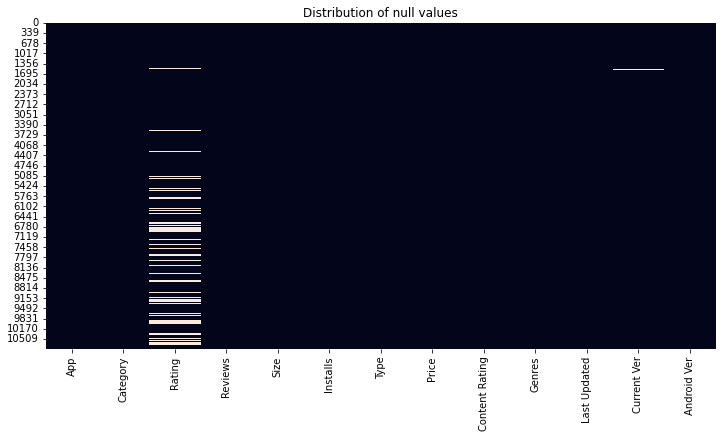

In [10]:
plt.figure(figsize=(12,6))
plt.title('Distribution of null values')
sns.heatmap(google_raw_df.isnull(), cbar=False)
plt.show()

Above in the heatmap and table, we can see that there are quite a few null values in the dataset. There are a total of 1,487 null values across the entire dataset with 1,474 missing points under 'Ratings', 1 under 'Type', 1 under 'Content Rating', 8 under 'Current Ver', and 3 under 'Android Ver'. We will have to handle all null data points before we can dive into EDA and modeling.

In [11]:
google_raw_df['Rating'].fillna('No Rating', inplace=True)
google_raw_df['Content Rating'].fillna('No Rating', inplace=True)
google_raw_df['Type'].fillna('Free', inplace=True)
google_raw_df['Current Ver'].fillna('None', inplace=True)
google_raw_df['Android Ver'].fillna('None', inplace=True)

In [12]:
google_raw_df.isnull().any()

App               False
Category          False
Rating            False
Reviews           False
Size              False
Installs          False
Type              False
Price             False
Content Rating    False
Genres            False
Last Updated      False
Current Ver       False
Android Ver       False
dtype: bool

In [13]:
google_raw_df=google_raw_df[~(google_raw_df['Price'] == 'Everyone')]

In [16]:
google_raw_df.Price=google_raw_df.Price.replace('$','')

C:\Users\Harsh Kumar\AppData\Local\Temp\ipykernel_11912\36911546.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  google_raw_df.Price=google_raw_df.Price.replace('$','')


In [23]:
google_raw_df.Price=google_raw_df.Price.str.replace('$','').astype(float)

C:\Users\Harsh Kumar\AppData\Local\Temp\ipykernel_11912\358271141.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  google_raw_df.Price=google_raw_df.Price.str.replace('$','').astype(float)
C:\Users\Harsh Kumar\AppData\Local\Temp\ipykernel_11912\358271141.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  google_raw_df.Price=google_raw_df.Price.str.replace('$','').astype(float)


In [18]:
google_raw_df.Reviews=google_raw_df.Reviews.astype(int)

C:\Users\Harsh Kumar\AppData\Local\Temp\ipykernel_11912\2353368488.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  google_raw_df.Reviews=google_raw_df.Reviews.astype(int)


In [19]:
google_raw_df.Rating=google_raw_df.Rating.replace('No Rating',0)

C:\Users\Harsh Kumar\AppData\Local\Temp\ipykernel_11912\2143829926.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  google_raw_df.Rating=google_raw_df.Rating.replace('No Rating',0)


In [20]:
google_raw_df.Rating=google_raw_df.Rating.astype(float)

C:\Users\Harsh Kumar\AppData\Local\Temp\ipykernel_11912\2051465008.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  google_raw_df.Rating=google_raw_df.Rating.astype(float)


In [25]:
google_raw_df['Installs'] = google_raw_df['Installs'].str.replace(',', '').str.rstrip('+').astype(int)

C:\Users\Harsh Kumar\AppData\Local\Temp\ipykernel_11912\3585687434.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  google_raw_df['Installs'] = google_raw_df['Installs'].str.replace(',', '').str.rstrip('+').astype(int)


# Exploratory Analysis and Visualization

First we will begin analysis on the entire playstore dataset consisting of entries. Revisiting the data, let us see how it looked like again.

In [26]:
google_raw_df.sample(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
6515,BN Pro RobotoXL-b HD Text,LIBRARIES_AND_DEMO,4.2,86,459k,10000,Free,0.00,Everyone,Libraries & Demo,"February 5, 2017",2.3.2,1.6 and up
4365,MX Player,VIDEO_PLAYERS,4.5,6469179,Varies with device,500000000,Free,0.00,Everyone,Video Players & Editors,"August 1, 2018",Varies with device,Varies with device
10768,AAFP,MEDICAL,3.8,63,24M,10000,Free,0.00,Everyone,Medical,"June 22, 2018",2.3.1,5.0 and up
2274,"Migraine, Headache Diary HeadApp Pro",MEDICAL,4.6,156,22M,500,Paid,3.49,Everyone,Medical,"March 14, 2018",1.10.0.user.pro.release,4.4 and up
6710,B R COACHINGS,FAMILY,0.0,1,9.2M,10,Free,0.00,Everyone,Education,"July 12, 2018",1.0,4.4 and up
2486,Teladoc Member,MEDICAL,4.0,2094,23M,500000,Free,0.00,Everyone,Medical,"July 26, 2018",3.19,4.3 and up
557,Sudy – Meet Elite & Rich Single,DATING,4.1,17268,40M,500000,Free,0.00,Mature 17+,Dating,"June 25, 2018",4.1.2,4.0.3 and up
3559,Time Recording - Timesheet App,PRODUCTIVITY,4.6,23393,Varies with device,1000000,Free,0.00,Everyone,Productivity,"July 12, 2018",Varies with device,Varies with device
5457,AP Mobile 104,BUSINESS,0.0,0,14M,100,Free,0.00,Everyone,Business,"December 13, 2017",1.2.2.0,4.0 and up
2022,Educational Games 4 Kids,FAMILY,4.3,11618,39M,5000000,Free,0.00,Everyone,Educational;Education,"April 3, 2018",2.4,4.1 and up


In [27]:
google_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          10840 non-null  float64
 3   Reviews         10840 non-null  int32  
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  int32  
 6   Type            10840 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10840 non-null  object 
 12  Android Ver     10840 non-null  object 
dtypes: float64(2), int32(2), object(9)
memory usage: 1.1+ MB


## Lets look different Category of Apps

C:\Users\Harsh Kumar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


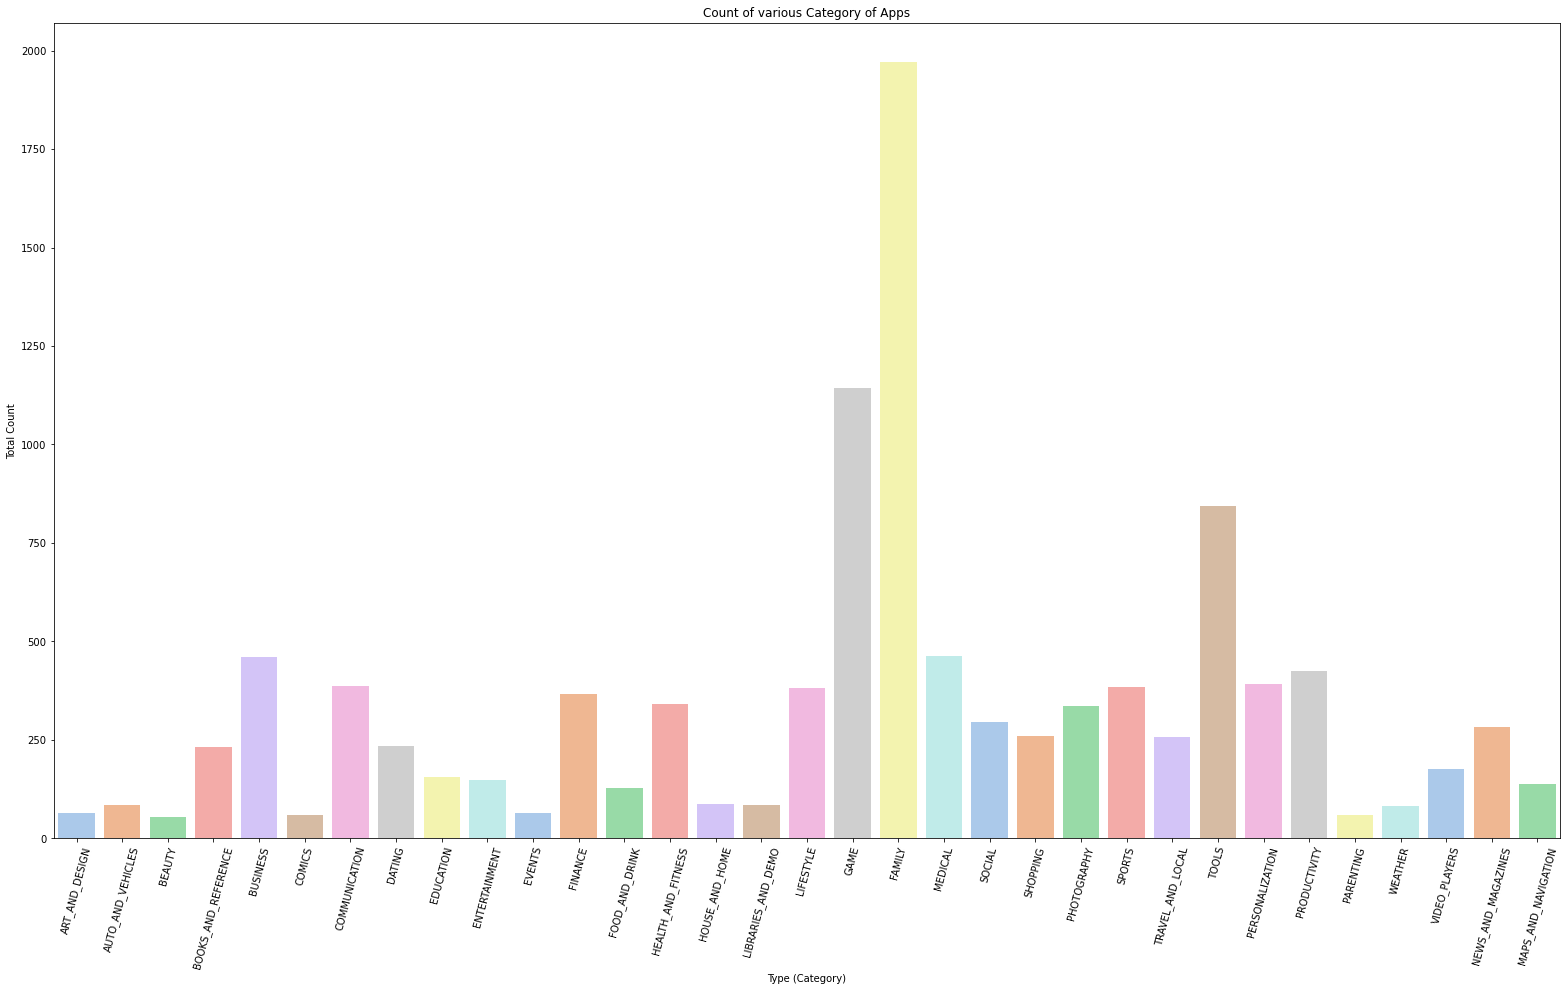

In [28]:
plt.figure(figsize=(27,15))
plt.xticks(rotation=75)
g = sns.countplot(google_raw_df.Category, palette="pastel");
plt.title("Count of various Category of Apps")
plt.xlabel("Type (Category)")
plt.ylabel("Total Count")
plt.show();

- So there are roughly 1950 apps of type 'Family' and around 1100 of category 'games' which are significant from the rest of the category.

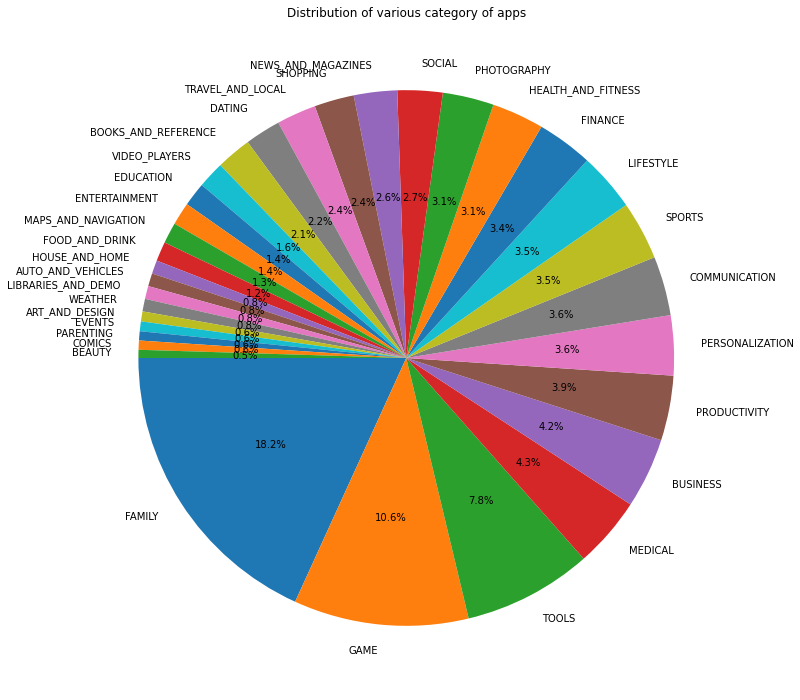

In [29]:
plt.figure(figsize=(12,16))
plt.title("Distribution of various category of apps")
plt.xticks(rotation=75)
g = plt.pie(google_raw_df.Category.value_counts(), labels=google_raw_df.Category.value_counts().index, autopct='%1.1f%%', startangle=180);

plt.show();

## Let us visualise the ratings through distplot

We will look at the distribution of ratings of Apps on playstore. Here rating of 0 represents that apps doest not have been ratted.

C:\Users\Harsh Kumar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


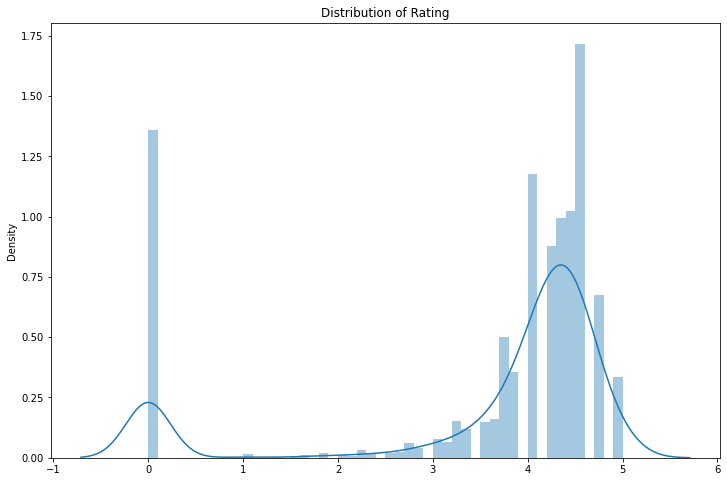

In [58]:
plt.figure(figsize=(12,8))
plt.title('Distribution of Rating')
sns.distplot(x=google_raw_df.Rating , bins=50,kde=True);

- As we see , most people seems to have given a good ratings of apps . we see a higher value of rating 0 ,which means that most of the apps are unrated.The observation of a higher number of rating 0 in app ratings suggests that a significant portion of the apps available has not received any ratings or user reviews. This can be indicative of several factors and considerations

 ## Content added each year
Now we will take a look at the amount content of Applications has added in the playstore throughout the previous years. Since we are interested in when Apps added  onto their platform, we will add a 'year_added' column shows the year of the date from the 'Last Updated' column as shown below.

In [31]:
google_raw_df['year_added'] = pd.DatetimeIndex(google_raw_df['Last Updated']).year
google_raw_df['month_added'] = pd.DatetimeIndex(google_raw_df['Last Updated']).month

C:\Users\Harsh Kumar\AppData\Local\Temp\ipykernel_11912\3364684080.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  google_raw_df['year_added'] = pd.DatetimeIndex(google_raw_df['Last Updated']).year
C:\Users\Harsh Kumar\AppData\Local\Temp\ipykernel_11912\3364684080.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  google_raw_df['month_added'] = pd.DatetimeIndex(google_raw_df['Last Updated']).month


In [33]:
Apps_year = google_raw_df['year_added'].value_counts().to_frame().reset_index().rename(columns={'index': 'year','year_added':'count'})
Apps_year = Apps_year[Apps_year.year != 2022]
Apps_year

,year,count
0,2018,7349
1,2017,1867
2,2016,804
3,2015,459
4,2014,209
5,2013,110
6,2012,26
7,2011,15
8,2010,1


- Let us visualise the trend through the line plot 

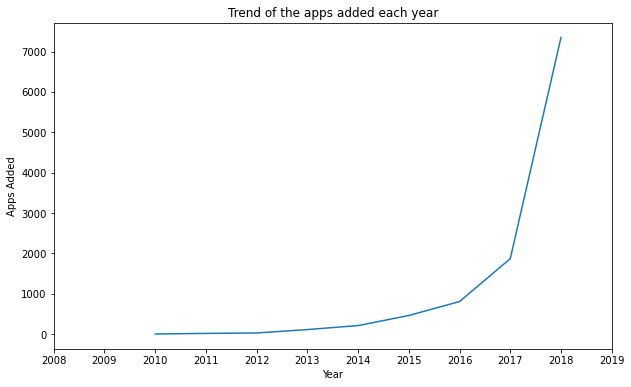

In [34]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(data=Apps_year, x='year', y='count')
ax.set_xticks(np.arange(2008, 2020, 1))
plt.ylabel("Apps Added")
plt.xlabel("Year")
plt.title('Trend of the apps added each year')
plt.show();

- Based on the above timeline, we can see that the majority of the apps  started increasing after 2016. Since then, the amount of Applicaton added has been tremendous. I decided to exclude apps added during 2020 since the data does not include a full years worth of data. We can see that there has been a consistent growth in the number of applications on playstore compared to previous years.

## Type of the Apps(Free/Paid)

let us now look at the proportion of the apps based on the category that if they are free or paid

C:\Users\Harsh Kumar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


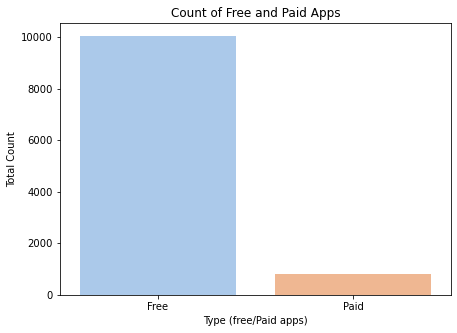

In [35]:
plt.figure(figsize=(7,5))
g = sns.countplot(google_raw_df.Type, palette="pastel");
plt.title("Count of Free and Paid Apps")
plt.xlabel("Type (free/Paid apps)")
plt.ylabel("Total Count")
plt.show()

- So there are roughly 700 paid apps and almost 10000 free applications present in google playstore. There is a drastic difference between the paid apps and free apps .
This  also makes sense that people use free apps at higher quantity than paid apps

## Let us visualise the top 10 apps based on their installations.

In [36]:
top_10_apps=google_raw_df.sort_values('Installs',ascending= False).head(15)
top_10_apps

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,year_added,month_added
3896,Subway Surfers,GAME,4.5,27711703,76M,1000000000,Free,0.0,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up,2018,7
3943,Facebook,SOCIAL,4.1,78128208,Varies with device,1000000000,Free,0.0,Teen,Social,"August 3, 2018",Varies with device,Varies with device,2018,8
335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,Varies with device,1000000000,Free,0.0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device,2018,8
3523,Google Drive,PRODUCTIVITY,4.4,2731211,Varies with device,1000000000,Free,0.0,Everyone,Productivity,"August 6, 2018",Varies with device,Varies with device,2018,8
3565,Google Drive,PRODUCTIVITY,4.4,2731211,Varies with device,1000000000,Free,0.0,Everyone,Productivity,"August 6, 2018",Varies with device,Varies with device,2018,8
2884,Google Photos,PHOTOGRAPHY,4.5,10859051,Varies with device,1000000000,Free,0.0,Everyone,Photography,"August 6, 2018",Varies with device,Varies with device,2018,8
3665,YouTube,VIDEO_PLAYERS,4.3,25655305,Varies with device,1000000000,Free,0.0,Teen,Video Players & Editors,"August 2, 2018",Varies with device,Varies with device,2018,8
2853,Google Photos,PHOTOGRAPHY,4.5,10858538,Varies with device,1000000000,Free,0.0,Everyone,Photography,"August 6, 2018",Varies with device,Varies with device,2018,8
4234,Skype - free IM & video calls,COMMUNICATION,4.1,10484169,Varies with device,1000000000,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device,2018,8
3687,Google Play Movies & TV,VIDEO_PLAYERS,3.7,906384,Varies with device,1000000000,Free,0.0,Teen,Video Players & Editors,"August 6, 2018",Varies with device,Varies with device,2018,8


- Let us visualise the name of app and their reviews distribution

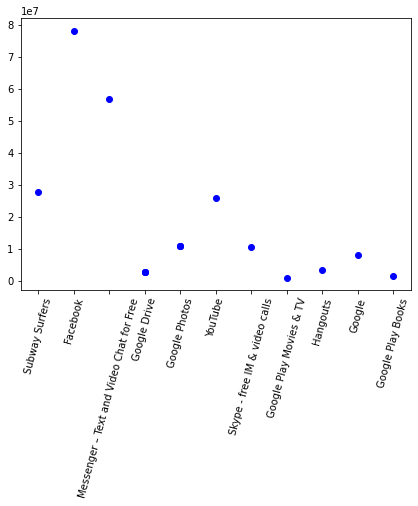

In [43]:
plt.figure(figsize=(7,5))
plt.xticks(rotation=75)
g2 = plt.plot(top_10_apps.App,top_10_apps.Reviews,'ob')

- As we see despite of higher number of installs there is uneven distribution of number of reviews of the apps. Here Facebook has the highest reviews and product of google seems to have lower reviews

# Asking and answering question

## Q. What are the top 10 genre for which apps are present most

In [53]:
top_10_genres=google_raw_df.Genres.value_counts().head(10)
top_10_genres

Tools              842
Entertainment      623
Education          549
Medical            463
Business           460
Productivity       424
Sports             398
Personalization    392
Communication      387
Lifestyle          381
Name: Genres, dtype: int64

C:\Users\Harsh Kumar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


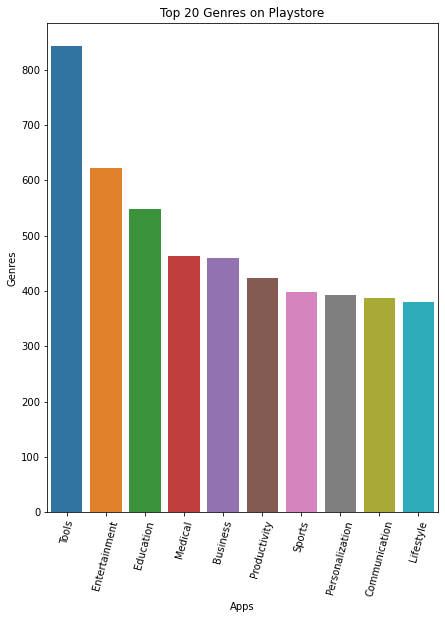

In [57]:

plt.figure(figsize=(7,9))
plt.xticks(rotation=75)
g = sns.barplot(top_10_genres.index,top_10_genres)
plt.title('Top 20 Genres on Playstore')
plt.xlabel('Apps')
plt.ylabel('Genres')
plt.show();

- as we look at the graph above Tools genre has the highest number of application present in the playstore followed by the Entertainment ,Education , etc.

## Q what are the average rating of the apps of different category?

In [60]:
average_rating = google_raw_df.groupby('Category')['Rating'].mean().round(3)
average_rating

Category
ART_AND_DESIGN         4.157
AUTO_AND_VEHICLES      3.599
BEAUTY                 3.391
BOOKS_AND_REFERENCE    3.349
BUSINESS               2.715
COMICS                 4.017
COMMUNICATION          3.525
DATING                 3.309
EDUCATION              4.361
ENTERTAINMENT          4.126
EVENTS                 3.119
FAMILY                 3.714
FINANCE                3.646
FOOD_AND_DRINK         3.576
GAME                   4.110
HEALTH_AND_FITNESS     3.725
HOUSE_AND_HOME         3.625
LIBRARIES_AND_DEMO     3.195
LIFESTYLE              3.366
MAPS_AND_NAVIGATION    3.667
MEDICAL                3.167
NEWS_AND_MAGAZINES     3.402
PARENTING              3.583
PERSONALIZATION        3.473
PHOTOGRAPHY            3.967
PRODUCTIVITY           3.486
SHOPPING               3.899
SOCIAL                 3.736
SPORTS                 3.509
TOOLS                  3.524
TRAVEL_AND_LOCAL       3.600
VIDEO_PLAYERS          3.715
WEATHER                3.882
Name: Rating, dtype: float64

- Let us find the correlation coefficient between the category and their avarage rating

In [73]:
correlation = google_raw_df['Category'].astype('category').cat.codes.corr(google_raw_df['Rating'])
correlation

0.011203261102644638

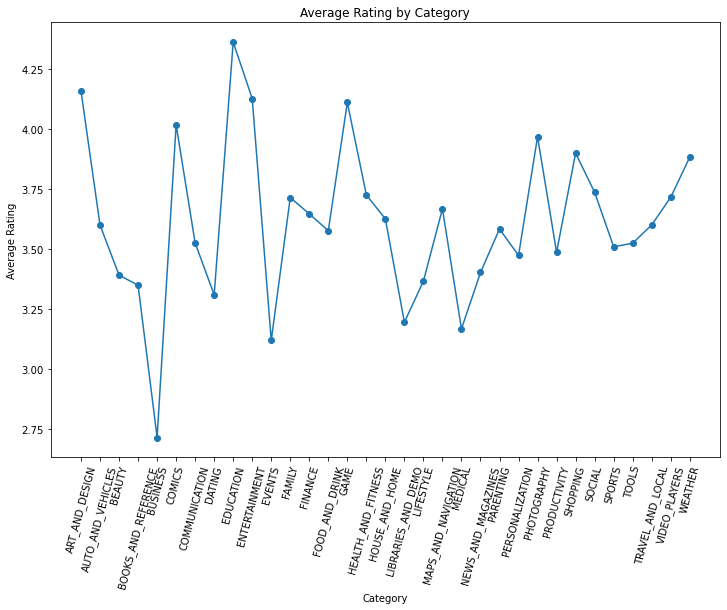

In [72]:
plt.figure(figsize=(12,8))
plt.xticks(rotation=75)
plt.plot(average_rating.index, average_rating.values,'o-')
plt.xlabel('Category')
plt.ylabel('Average Rating')
plt.title('Average Rating by Category')
plt.show()

- As we see here the avarage ratings of different category applications present in playstore. We see that Education has highest rating whereas Bussiness has lowest.

## Q What is the correlation between the number of apps install and thier reviews?

In [75]:
correlation = google_raw_df['Installs'].corr(google_raw_df['Reviews'])
print('Correlation:', correlation)

Correlation: 0.6431220683230656


- Let us visualise the relation between the amount of app install and their reviews

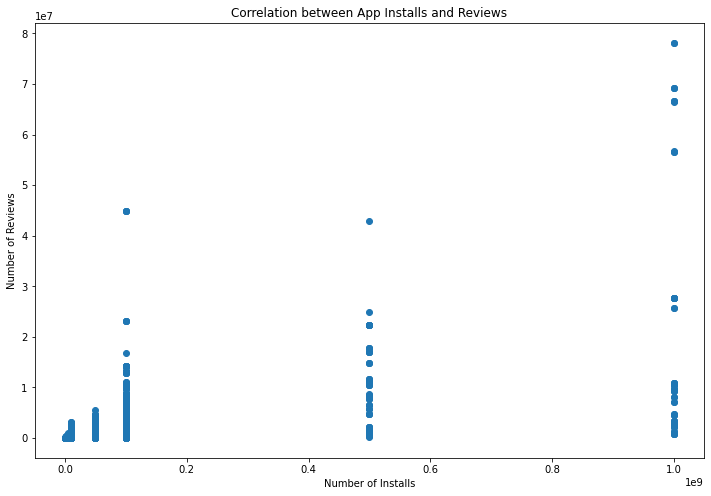

In [80]:
# Create a scatter plot
plt.figure(figsize=(12,8))
plt.scatter(google_raw_df['Installs'], google_raw_df['Reviews'])
plt.xlabel('Number of Installs')
plt.ylabel('Number of Reviews')
plt.title('Correlation between App Installs and Reviews')
plt.show()


- As we see that the more the app installed the greater reviews they get.

## Q What is the distribution between the App type(free/paid) and their installations

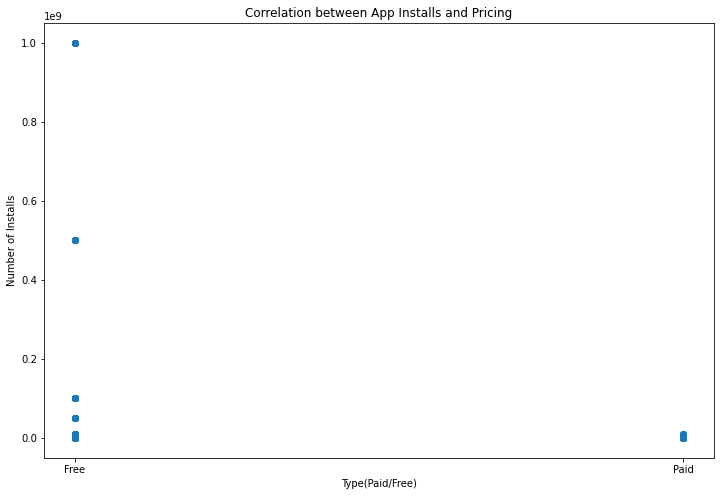

In [92]:
plt.figure(figsize=(12,8))
plt.scatter(google_raw_df['Type'],google_raw_df['Installs'])
plt.xlabel('Type(Paid/Free)')
plt.ylabel('Number of Installs')
plt.title('Correlation between App Installs and Pricing')
plt.show()


- In the dataset, a clear trend emerges where free apps have significantly higher installation numbers compared to paid apps. This indicates that users are more inclined to download and install free apps, potentially due to the lower barrier to entry and accessibility. The popularity and widespread adoption of free apps reflect the preferences of users in seeking cost-free options when exploring and utilizing mobile applications.

## Q what is the distribution of the Content Rating of different groups?

In [96]:
google_raw_df = google_raw_df.rename(columns={'Content Rating': 'Content_Rating'})

In [1]:
plt.figure(figsize=(7,5))
g = sns.countplot(google_raw_df.Content_Rating, palette="pastel");
plt.xticks(rotation=75)
plt.title("Distribution of content rating on different groups")
plt.xlabel("groups")
plt.ylabel("Total Count")
plt.show()

NameError: name 'plt' is not defined

- As we clearly see the number of content rating availabe for everyone has extreme height compare to the other groups also we see that there is no apps which is unratted or available for 18+.

## Q What is the year- Month distribution of the apps installed?

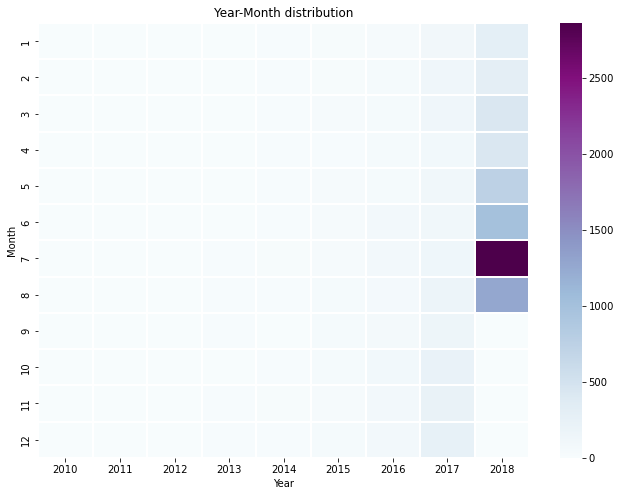

In [102]:
intmov_month_year_df = google_raw_df.groupby('year_added')['month_added'].value_counts().unstack().fillna(0).T

fig, ax = plt.subplots(figsize=(11, 8))
sns.heatmap(intmov_month_year_df, linewidths=0.025, cmap="BuPu")
plt.title('Year-Month distribution')
plt.ylabel("Month")
plt.xlabel("Year")
plt.show()

- As we clearly see here that in 2018 in month july , the highest apps were installed.

# Inference and conclusion


Google Play Store data is a rich and extensive collection of information related to mobile applications available on the Android platform. It provides valuable insights into app categories, ratings, reviews, installs, prices, and other relevant metrics. The usage of Google Play Store data is widespread and beneficial in several ways:
- App Development and Marketing: Developers and marketers can analyze the data to understand the popularity of different app categories, identify trends, and gain insights into user preferences. 
- Market Research: Researchers and analysts can leverage the Google Play Store data to conduct market research
- User Feedback and Reviews: The data enables the analysis of user ratings, reviews, and feedback for various apps. This feedback can be invaluable in understanding user sentiment, identifying areas for improvement, and enhancing the overall user experience.
- By effectively utilizing Google Play Store data, stakeholders can enhance their decision-making processes, increase app performance, and deliver value to users in the dynamic and competitive mobile app ecosystem.    

## Future work

- Youtube data Analysis
- IMDB data Analysis
- Recommender System
- More pretty seaborn graphs

## References

 - All of my doubts has been clared at https://stackoverflow.com

 - For knowing more about pandas and it's functions in deatil - https://pandas.pydata.org

 - For more ideas on Matplotlib and it's library- https://matplotlib.org

 - Also for many coding related doubts, refferd to - https://www.w3schools.com